# EICU data analysis

Here we run some basic analysis of the quality of data in the Emergency Information Coordination Unit (EICU) Rapid Damage Assessment data for the 2015 East Coast Low event in the Hunter Valley. 

There are some 2000 records in the database, covering communities from the NSW Central Coast and Hunter Valley region. 

We intend to use this data in conjunction with high-resolution numerical weather prediction data from the event to derive damage or fragility functions, which can then be used in an impact-based foreacting workflow for improving the information provided back to emergency managers. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from os.path import join as pjoin
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")
sns.set_palette("Set1")

In [2]:
def percentage(df, field):
    # This returns the percentage of records in each category,
    # including missing values in the total number
    pct = (df[field].value_counts()/len(df[field]))*100
    return pct

In [3]:
dataPath = r"X:\georisk\HaRIA_B_Wind\projects\impact_forecasting\data\exposure\NSW\April_2015_Impact_Assessment/"
dataFile = "Property_Damage_cleaned.csv"
df = pd.read_csv(pjoin(dataPath, dataFile), skipinitialspace=True)
df.describe()

,OBJECTID,papoid,postcode,latitude,longitude,floorlngth,floorlng_1,floorwidth,numbsement,numaprt,numaprthab,Field42,Field50,combined_alltimes_maxwind_stage4_ens12,combined_alltimes_maxwind_stage4_ens22,combined_alltimes_accum_ls_rainrate_stage4_ens00,combined_alltimes_accum_ls_rainrate_stage4_ens03,combined_alltimes_accum_ls_rainrate_stage4_ensMEAN,combined_alltimes_accum_ls_rainrate_stage4_ensSTD
count,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000,2071.00000,2071.000000,2071.00000,2071.000000,2071.000000,0.0,0.0,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,1.057098e+08,2019.283921,-32.728758,150.886424,5.370835,4.79197,0.470787,0.01014,0.169000,0.026557,NaN,NaN,13.084776,13.820326,0.006359,0.008450,0.007917,0.005262
std,597.990524,1.539815e+07,787.069650,2.313949,10.513947,10.599362,9.57106,0.719629,0.10021,1.357543,0.429323,NaN,NaN,5.882106,5.762940,0.004258,0.003709,0.002034,0.001299
min,1.000000,0.000000e+00,0.000000,-33.397796,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,518.500000,1.005052e+08,2259.000000,-33.257652,151.478116,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,8.096457,9.399900,0.002466,0.005590,0.006304,0.004270
50%,1036.000000,1.007948e+08,2262.000000,-32.814658,151.572074,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,10.927159,10.996349,0.005933,0.007104,0.007326,0.005176
75%,1553.500000,1.037081e+08,2420.000000,-32.407431,151.755258,10.000000,10.00000,1.000000,0.00000,0.000000,0.000000,NaN,NaN,17.220442,17.598497,0.008718,0.011350,0.010589,0.006169
max,2071.000000,1.717092e+08,2553.000000,0.000000,151.971950,150.000000,200.00000,10.000000,1.00000,32.000000,10.000000,NaN,NaN,24.877268,25.686609,0.022923,0.024924,0.011387,0.007938


In [4]:
df.columns

Index(['OBJECTID', 'createdate', 'GlobalID', 'srcglobali', 'papoid', 'srcid',
       'assessoff', 'teamid', 'dateinsp', 'agency', 'eventname', 'eventtype',
       'areainspd', 'position_', 'number_', 'street', 'streettype', 'suburb',
       'state_', 'postcode', 'country', 'longaddrss', 'gurasaddrs', 'latitude',
       'longitude', 'propinsurd', 'continsurd', 'buildnguse', 'foundation',
       'structure_', 'roof', 'floorlngth', 'floorlng_1', 'floorwidth',
       'numbsement', 'numaprt', 'numaprthab', 'asbestos', 'pwrwiredwn',
       'dangertree', 'othdebris', 'Field42', 'propstatus', 'degdamage',
       'roofdam', 'frmecollap', 'bldleaning', 'rackingdam', 'grndmovemt',
       'Field50', 'waterinund', 'maxwatrlev', 'washoutreq', 'validaddre',
       'EICU_Degdamage', 'EICU_Deg_1', 'Comments',
       'combined_alltimes_maxwind_stage4_ens12',
       'combined_alltimes_maxwind_stage4_ens22',
       'combined_alltimes_accum_ls_rainrate_stage4_ens00',
       'combined_alltimes_accum_ls_rain

Examine the completeness of the records. Here we show the percentage of each field with entries (we haven't yet checked the valididity of those entries).

In [5]:
qdf = pd.DataFrame(100. - 100 * df.isnull().sum()/len(df))
qdf

,0
OBJECTID,100.000000
createdate,100.000000
GlobalID,100.000000
srcglobali,100.000000
papoid,100.000000
srcid,87.880251
assessoff,99.130855
teamid,85.852245
dateinsp,87.880251
agency,85.852245


The level of damage is recorded in the `EICU_Degdamage` field, while the damage to individual structural elements is under `roofdam`, `frmecollap`, `bldleaning`, `rackingdam` and `grndmovement`. There is also a field for water inundation (`waterinund`), and a field recording the depth of water inundation (`maxwatrlev`). These fields are completed to greater and lesser degrees:

In [6]:
qdf.loc[['EICU_Degdamage', 'frmecollap', 'bldleaning', 
         'rackingdam', 'grndmovemt', 'waterinund', 
         'maxwatrlev']]

,0
EICU_Degdamage,99.179141
frmecollap,26.846934
bldleaning,26.315789
rackingdam,26.605505
grndmovemt,26.122646
waterinund,63.544182
maxwatrlev,9.753742


Most of the damage-related attributes are categorical:

In [7]:
df.EICU_Degdamage.value_counts()

No Damage - 0%            1465
Minor Impact - 1-25%       375
Major Impact - 26-50%      147
Severe Impact - 51-75%      53
Destroyed - 76-100%         14
Name: EICU_Degdamage, dtype: int64

In [8]:
percentage(df, 'EICU_Degdamage')

No Damage - 0%            70.738774
Minor Impact - 1-25%      18.107195
Major Impact - 26-50%      7.098020
Severe Impact - 51-75%     2.559150
Destroyed - 76-100%        0.676002
Name: EICU_Degdamage, dtype: float64

## Water-related damage

Let's start by looking through the water damage fields. Water inundation can occur through multiple mechanisms: water rising up through the floor level (flood inundation), water flowing down through a property (storm), water ingress through openings (e.g. windows, doors, damage to roof, etc.). 

In [9]:
df.waterinund.value_counts()

No                883
Not Applicable    242
Yes               191
Name: waterinund, dtype: int64

In [10]:
percentage(df, 'waterinund')

No                42.636408
Not Applicable    11.685176
Yes                9.222598
Name: waterinund, dtype: float64

So less than 10% of surveyed buildings were identified as inundated. There's still just under 40% of the survey population that we have no information about the state of inundation.

In [11]:
df.maxwatrlev.value_counts()

5mm - 300mm (Water up to Powerpoint Level)         81
1mm - 5mm (water over floor coverings)             40
300mm - 1500mm (Water up to Light Switch Level)    40
1500mm - 2400mm (Water up to ceiling)              23
Not Applicable                                     18
Name: maxwatrlev, dtype: int64

What if we look into the quality of the recorded information for inundated buildings? Here, we select all the buildings which have been identified as inundated (`waterinund='Yes'`), then look at the value counts of the categorical entries. There are a small number where there is inundation, but the `maxwatrlev` is recorded as 'Not Applicable'. 

In [12]:
df[df.waterinund=='Yes']['maxwatrlev'].value_counts()

5mm - 300mm (Water up to Powerpoint Level)         80
300mm - 1500mm (Water up to Light Switch Level)    40
1mm - 5mm (water over floor coverings)             36
1500mm - 2400mm (Water up to ceiling)              23
Not Applicable                                      8
Name: maxwatrlev, dtype: int64

In [13]:
percentage(df[df.waterinund=='Yes'],'maxwatrlev')

5mm - 300mm (Water up to Powerpoint Level)         41.884817
300mm - 1500mm (Water up to Light Switch Level)    20.942408
1mm - 5mm (water over floor coverings)             18.848168
1500mm - 2400mm (Water up to ceiling)              12.041885
Not Applicable                                      4.188482
Name: maxwatrlev, dtype: float64

So just over 4% of buildings identified as inundated are given a maximum water level of "Not Applicable". The question to be asked is whether this is water ingress resulting in damage to linings (e.g. through ceilings), or an incorrectly recorded field.

Around 40% of buildings identified as having been inundated had water between 5 and 300mm deep through the building. We can only presume this is above floor level.

__Issue__: Is there a way to relate a forecast variable to the water level above floor height?

Is it possible to identify the cause of inundation? Where there is water inundation, what is the recorded roof damage? 22 buildings are identified as having water inundation and some level of roof damage:

In [14]:
df[df.waterinund=='Yes']['roofdam'].value_counts()

Not Applicable    83
Stable            42
Minor              9
Moderate           8
Severe             5
Name: roofdam, dtype: int64

In [15]:
df[df.waterinund=='Yes']['frmecollap'].value_counts()

Not Applicable    87
Stable            46
Moderate           4
Minor              4
Severe             2
Name: frmecollap, dtype: int64

Is it possible to use the `eventtype` field to attribute the cause of damage to a building? Let's start with examining the value counts of unique values in this field:

In [16]:
df.eventtype.value_counts()

Flood    1883
Storm     188
Name: eventtype, dtype: int64

The vast majority of entries recorded in the EICU data are listed as a flood event. This does seem unusual, given the event was an East Coast Low. So does this indicate the cause of damage? Unlikely, given over 1100 surveyed buildings were identified to have no water inundation, or not applicable. 

Is there any correspondence between `eventtype` and `waterinund`?

In [17]:
df[df.eventtype=='Flood']['waterinund'].value_counts()

No                883
Not Applicable    242
Yes               191
Name: waterinund, dtype: int64

In [18]:
df[df.eventtype=='Storm']['roofdam'].value_counts()

Series([], Name: roofdam, dtype: int64)

Even when we examine 'Storm' events, there's no correlation to damage type - there's no entry where the `eventtype` is 'Storm' and damage to the roof has been recorded. 

In [19]:
df[df.eventtype=='Storm']['EICU_Degdamage'].value_counts()

Minor Impact - 1-25%      106
Major Impact - 26-50%      32
Severe Impact - 51-75%     23
No Damage - 0%             14
Destroyed - 76-100%         3
Name: EICU_Degdamage, dtype: int64

Of the 188 entries identified as 'Storm' events, 164 have some level of damage (i.e. not 'No Damage'). 

What is required is a field that indicates the primary cause of damage to a building such as wind, rain, flood, hail, etc. or some combination of these. 

We could make an assumption that roof damage is caused by wind, but that's not always the case (what about a hail storm). Similarly, is water damage always caused by flooding? Or is there a likelihood that it was wind-driven rain leading to water ingress?

A recommendation we could make to the Emergency Services is to include a field identifying the primary hazard causing damage, which is a categorical field with a set number of options that can then allow us to attribute the cause of damage, which in turn allows us to refine the damage functions.

The __National Damage Assessment Data Set and Dictionary for Phase 2 Assessments Guideline__ (AFAC, 2016) could be an avenue to formalise the collection of the hazard type that drives damage. The NDA DSD contains mandatory fields for collection for a range of hazard events, but there is no field that records the physical mechanism causing damage to structures - i.e. whether it is wind, rain, flood, fire, etc. The Guideline includes an 'Event Type' field, but this is not sufficient to be able to derive damage (or fragility) functions suitable for implementation in impact-based forecasting workflows. For example, an event type of "Cyclone" may result in damage from winds, rainfall, or storm surge. A "Storm" event could entail wind damge, hail damage or flood damage (and may cover east coast lows or thunderstorms). 

A recommendation to emergency services would be to collect the additional contextual information on the primary physical  mechanism of damage. To achieve this, there are a number of actions required:

- [ ] Check with our EM end-users about the implementation of the NDA DSD in their post-disaster survey/rapid damage assessment activities. THis would guide us on the value of using the NDA DSD to drive the required changes to data collection.
- [ ] Identify an appropriate field, with corresponding values, that would best serve our needs
- [ ] Clearly articulate the benefits of collecting this additional data
- [ ] Identify with AFAC opportunities for revision of the NDA DSD


### General data quality 

Here's an example of an incorrectly completed field. The value of 'NSWTF1' is in fact a value in the `teamid` field, but it's been transposed into the `frmecollap` field. There appear to be some similar transpositions in other fields, so maybe it's only a minor hiccup in the extraction.

In [20]:
df.frmecollap.value_counts()

Not Applicable    389
Stable            126
Moderate           16
Minor              13
Severe              9
NSWTF1              3
Name: frmecollap, dtype: int64


### Just do some quick cleaning up of the data

There are a number of blank fields throughout the data where a value was not entered into the dataset by the assessor. We need to keep track of the missing data, as well as the entered data, so we will find all 'NaN' values in the dataset, and change these to 'Not given' so we can include them in subsequent analyses.

In [21]:
df = df.fillna('Not given')

In [22]:
df.count()

OBJECTID                                              2071
createdate                                            2071
GlobalID                                              2071
srcglobali                                            2071
papoid                                                2071
srcid                                                 2071
assessoff                                             2071
teamid                                                2071
dateinsp                                              2071
agency                                                2071
eventname                                             2071
eventtype                                             2071
areainspd                                             2071
position_                                             2071
number_                                               2071
street                                                2071
streettype                                            20

In [23]:

damage = df.groupby('EICU_Degdamage').count()
damage.OBJECTID

EICU_Degdamage
Destroyed - 76-100%         14
Major Impact - 26-50%      147
Minor Impact - 1-25%       375
No Damage - 0%            1465
Not given                   17
Severe Impact - 51-75%      53
Name: OBJECTID, dtype: int64

Text(0.5, 0, 'Damage state')

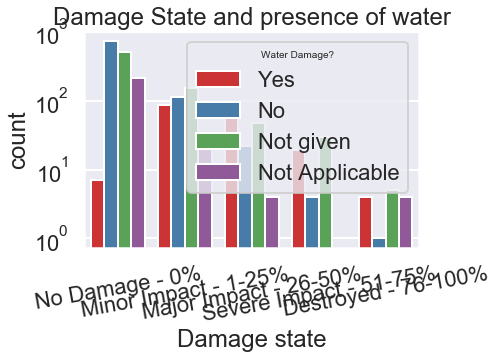

In [24]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="waterinund", data=df, order=order)
ax.legend(title="Water Damage?", loc=1)
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Damage State and presence of water')
plt.xlabel('Damage state')

### Damage by roof type

Is there any relationship between roof type and sustained damage? We group the data by the damage state, then look at the breakdown by roof material. i.e. what percentage of destroyed houses have tile or metal sheeting roofs? 

In [25]:
temp = []
for name, group in df.groupby('EICU_Degdamage'):
    numingroup = group['OBJECTID'].count()
    numroofs = group.groupby('roof').count()
    percroofs = numroofs['OBJECTID']/numingroup*100
    for keys in percroofs.keys():
        temp.append((name, keys, percroofs[keys]))

roofdamage = pd.DataFrame(temp, columns = ['Damage_state', 'Roof_type', 'Percent'])
roofdamage

,Damage_state,Roof_type,Percent
0,Destroyed - 76-100%,Metal Sheeting,42.857143
1,Destroyed - 76-100%,Not Applicable,7.142857
2,Destroyed - 76-100%,Not given,21.428571
3,Destroyed - 76-100%,Tile,28.571429
4,Major Impact - 26-50%,Fibre Sheeting,0.680272
5,Major Impact - 26-50%,Metal Sheeting,38.095238
6,Major Impact - 26-50%,Not Applicable,2.721088
7,Major Impact - 26-50%,Not given,27.891156
8,Major Impact - 26-50%,Tile,30.612245
9,Minor Impact - 1-25%,Fibre Sheeting,0.800000


C:\WorkSpace\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\WorkSpace\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 33.800000000000026, 'Damage state')

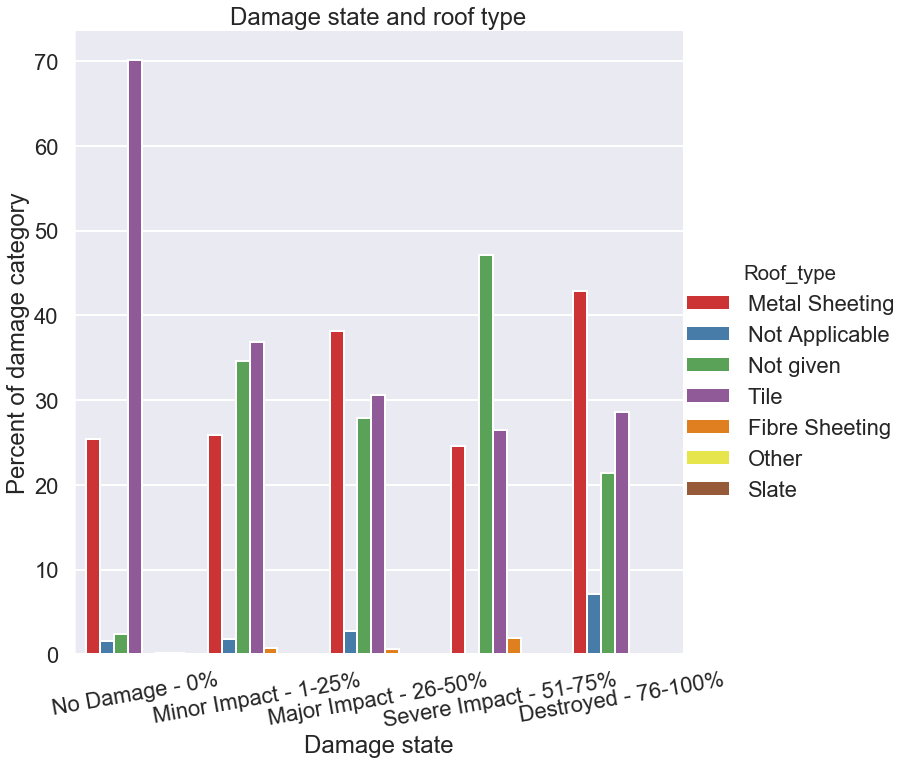

In [26]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.factorplot(x="Damage_state", y = 'Percent', hue="Roof_type", data=roofdamage, order=order, kind = 'bar', size = 10)
plt.xticks(rotation=10)
plt.title('Damage state and roof type')
plt.ylabel('Percent of damage category')
plt.xlabel('Damage state')

It doesn't appear that there is a clear relationship. The breakdown by roof material is (approximately) the same in each damage category, reflecting the overall population distribution of roof materials. 

### Habitability

Is the `Habitable` field of a reasonable quality? We plot the number of buildings in each combination of habitability and damage category. It appears that theres a good attribution of habitability against the damage state, but the combination of damage state and habitability in the `Habitable` field is confounding. It's worth noting the AFAC National Damage Assessment Data Set Dictionary indicates the `Habitable` field should be 'Habitable', 'Not Habitable' or 'Not stated'.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

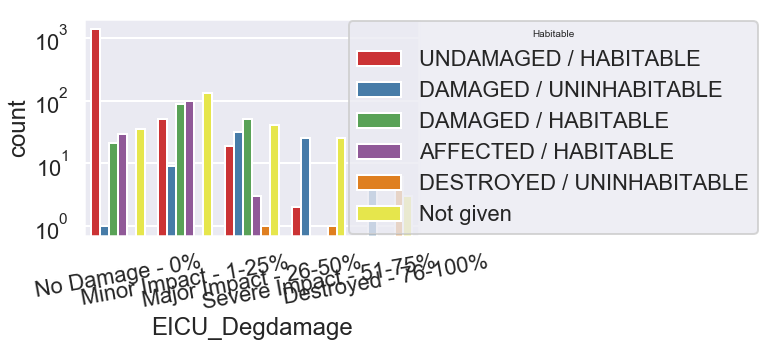

In [27]:
order = ['No Damage', 'Minor', 'Moderate', 'Severe', 'Total']
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="propstatus", data=df, order=order)
ax.legend(title="Habitable", loc=10, bbox_to_anchor=(1.4, 0.5))
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)


Is it possible to link habitability to roof material?

C:\WorkSpace\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


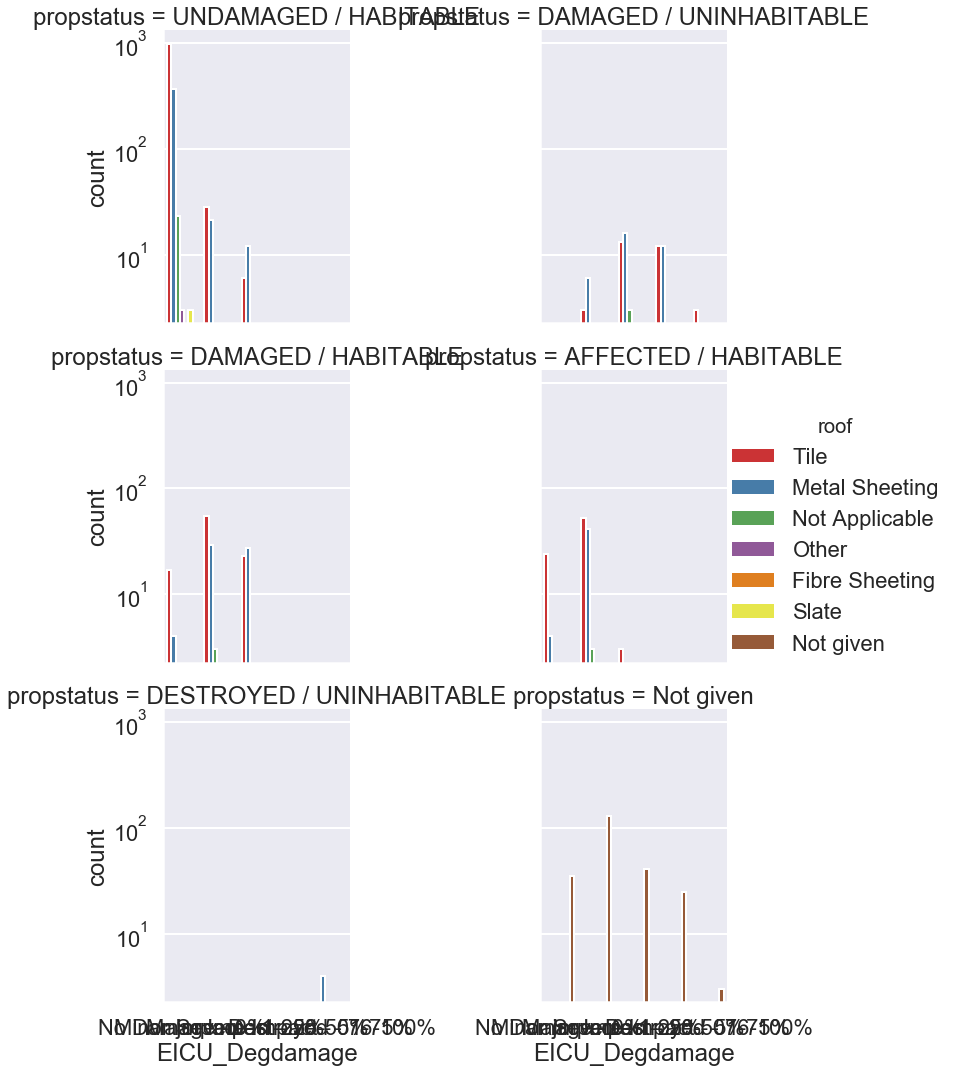

In [28]:
g = sns.factorplot(x="EICU_Degdamage", hue="roof", col="propstatus", data=df, kind="count", order=order, col_wrap=2)
g.axes[0].set_yscale("log", nonposy="clip")

## Damage state versus incident wind speed

Now we will compare the damage state to the incident wind speeds simulated in the high-resolution ensemble forecast for the event. We've extracted the maximum wind speed at all building locations for a couple of ensemble members, then included them in the data frame. We then plot the incident wind speed against the assigned damage category for each point, and see if there's any reasonable relationship.

In the first step, we multiply the incident wind speed by a factor of 1.6, which represents a conversion from 10-minute wind speed to a 3-second gust wind speed. 

In [29]:
df['combined_alltimes_maxwind_stage4_ens12'] = df['combined_alltimes_maxwind_stage4_ens12'] * 1.6
df['combined_alltimes_maxwind_stage4_ens22'] = df['combined_alltimes_maxwind_stage4_ens22'] * 1.6

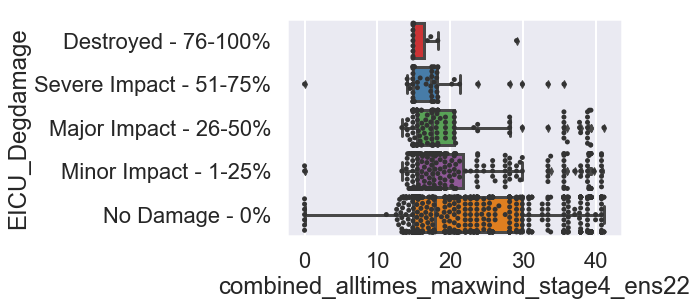

In [30]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens22", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens22", data = df, order = order, color = "0.2")

So it doesn't look very good! The destroyed buildings were wxposed to an incident wind speed of about 25 m/s, but there were vastly more buildings exposed to higher wind speeds that suffered only minor impact, or no damage. And this is of the buildings that were surveyed. 

We can look at another ensemble member to see if this is consistent...

In [ ]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens12", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens12", data = df, order = order, color = "0.2")

The same result, albeit a slightly lower wind speed for the collection of destroyed buildings. This suggests that wind speed was not a significant factor in the damage sustained in this event, at least for the more severely destroyed buildings. 

But one thing that does stand out is the sudden onset of damage to buildings. This may be a feature of the event itself - i.e. the maximum winds were generally above about 20 m/s - or it may arise because of the vulnerability profile of building stock in the area. 

We now take a cursory look at the potential for a threshold of damage. We define a field that is 0 if the damage category is "No Damage" and 1 otherwise. Then do a basic regression plot of wind speed against damaged/not damaged.

In [ ]:
damaged = np.zeros(len(df))
damaged[df['EICU_Degdamage'].isin(['Destroyed - 76-100%', 
                                 'Severe Impact - 51-75%', 
                                 'Major Impact - 26-50%', 
                                 'Minor Impact - 1-25%'])] = 1

df['Damaged'] = damaged

sns.lmplot(y = "Damaged", x = "combined_alltimes_maxwind_stage4_ens12", data = df,logistic=True, )


This is explored in more detail in another notebook.

